# Data cleaning and exploration on listings.csv 

In [1]:
# importing datasets and libraries
import pandas as pd
import numpy as np
!pip install textblob
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\NIMISH\listings.csv.zip')
data_cleaning = pd.read_csv(r'C:\Users\NIMISH\calendar.csv.zip')
data_reviews = pd.read_csv(r'C:\Users\NIMISH\reviews.csv.zip')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [2]:
# Reviewing columns
data.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
df = pd.DataFrame(data)

In [5]:
# Calculating missing values
missing_values = data.isnull().sum()
missing_values.info()

<class 'pandas.core.series.Series'>
Index: 92 entries, id to reviews_per_month
Series name: None
Non-Null Count  Dtype
--------------  -----
92 non-null     int64
dtypes: int64(1)
memory usage: 1.4+ KB


In [6]:
# Calculating the missing values
listings_miss = pd.DataFrame((df.isnull().sum())*100/len(df),columns=['% Missing Values'])

In [7]:
listings_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, id to reviews_per_month
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   % Missing Values  92 non-null     float64
dtypes: float64(1)
memory usage: 1.4+ KB


In [8]:
missing_values

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [9]:
# Missing values with above 80%
listings_miss[listings_miss['% Missing Values']>80]

,% Missing Values
square_feet,97.459403
license,100.000000


In [10]:
# dropping unnecesaary column
df.drop(columns='square_feet')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [11]:
df.drop(columns='license')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,10.0,8.0,f,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,10.0,f,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,NaN,f,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,NaN,f,WASHINGTON,f,moderate,f,f,1,NaN


In [15]:
# Removing non-integer characters and converting into float datatype
df['weekly_price'] = df['weekly_price'].str.replace('$','',regex = False)
df['weekly_price'] = df['weekly_price'].replace(',','',regex = True)
df['weekly_price'] = df['weekly_price'].astype(float)
print(df['weekly_price'])

0          NaN
1       1000.0
2          NaN
3        650.0
4          NaN
         ...  
3813       NaN
3814       NaN
3815     450.0
3816       NaN
3817       NaN
Name: weekly_price, Length: 3818, dtype: float64


In [18]:
df['price'] = df['price'].str.replace('$','',regex = False)
df['price'] = df['price'].replace(',','',regex = True)
df['price'] = df['price'].astype(float)

In [19]:
df['monthly_price'] = df['monthly_price'].str.replace('$','',regex = False)
df['monthly_price'] = df['monthly_price'].replace(',','',regex = True)
df['monthly_price'] = df['monthly_price'].astype(float)

In [20]:
df['weekly_price']=df['weekly_price'].fillna(df['price']*6,inplace=False)

In [21]:
df['monthly_price'] = df['monthly_price'].fillna(df['weekly_price']*3,inplace=False)

In [22]:
prices = df[['price','monthly_price','weekly_price']]

In [23]:
prices

,price,monthly_price,weekly_price
0,85.0,1530.0,510.0
1,150.0,3000.0,1000.0
2,975.0,17550.0,5850.0
3,100.0,2300.0,650.0
4,450.0,8100.0,2700.0
...,...,...,...
3813,359.0,6462.0,2154.0
3814,79.0,1422.0,474.0
3815,93.0,1350.0,450.0
3816,99.0,1782.0,594.0


In [24]:
# Removing non-null characters and replacing null values with mean
df['security_deposit'] = df['security_deposit'].str.replace('$','',regex = False)
df['security_deposit'] = df['security_deposit'].replace(',','',regex = True)
df['security_deposit'] = df['security_deposit'].astype(float)

In [25]:
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$','',regex = False)
df['cleaning_fee'] = df['cleaning_fee'].replace(',','',regex = True)
df['cleaning_fee'] = df['cleaning_fee'].astype(float)

In [26]:
mean_security = df['security_deposit'].mean()

In [27]:
df['security_deposit'] = df['security_deposit'].fillna(mean_security,inplace=False)

In [28]:
mean_cleaning = df['cleaning_fee'].mean()
df['cleaning_fee'] = df['cleaning_fee'].fillna(mean_cleaning,inplace=False)

In [29]:
fees = df[['security_deposit','cleaning_fee']]
fees

,security_deposit,cleaning_fee
0,287.610397,61.710904
1,100.000000,40.000000
2,1000.000000,300.000000
3,287.610397,61.710904
4,700.000000,125.000000
...,...,...
3813,287.610397,230.000000
3814,500.000000,50.000000
3815,250.000000,35.000000
3816,300.000000,45.000000


# Data cleaning and exploration on calendar.csv

In [30]:
# Converting into dataframe
df_cleaning = pd.DataFrame(data_cleaning)

In [31]:
df_cleaning.columns


Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [32]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [34]:
# Removing non-integer characters
df_cleaning['price'] = df_cleaning['price'].str.replace('$','',regex=False)

df_cleaning['price'] = df_cleaning['price'].replace(',','',regex=True)
df_cleaning['price'] = df_cleaning['price'].astype(float)

In [35]:
# Finding the mean
mean_cleaning = df_cleaning['price'].mean()

In [36]:
# Replacing null values with mean
df_cleaning['price'] = df_cleaning['price'].fillna(mean_cleaning,inplace=False)

clean = df_cleaning[['price']]
clean

In [70]:
# Replacing strings with integers according to true/False or according to month
df_cleaning['date'] = pd.to_datetime(df_cleaning['date'])
df_cleaning['available'] = df_cleaning['available'].replace({'t':1,'f':0})
df_cleaning['month'] = df_cleaning['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May' ,6:"June" , 7:"July" , 8: "August" , 9:"September" , 10: "October" , 11:"November" , 12:"December"})

In [44]:
df_cleaning['month'] = df_cleaning['date'].dt.month

In [45]:
df_cleaning['month']

0           1
1           1
2           1
3           1
4           1
           ..
1393565    12
1393566    12
1393567    12
1393568     1
1393569     1
Name: month, Length: 1393570, dtype: int64

# Data cleaning and exploration on reviews.csv

In [41]:
# Converting into a Dataframe
df_reviews = pd.DataFrame(data_reviews)

In [46]:
# Checking the columns
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [47]:
# Dropping the null values
df_reviews = df_reviews.dropna()

In [48]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84831 non-null  int64 
 1   id             84831 non-null  int64 
 2   date           84831 non-null  object
 3   reviewer_id    84831 non-null  int64 
 4   reviewer_name  84831 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.5+ MB


# Visualization and statistics on reviews.csv

In [49]:
df_reviews['sentiment'] = df_reviews['comments'].apply(lambda comment: TextBlob(comment).sentiment.polarity)

# Filter positive and negative comments
positive_comments = df_reviews[df_reviews['sentiment'] > 0]
negative_comments = df_reviews[df_reviews['sentiment'] < 0]

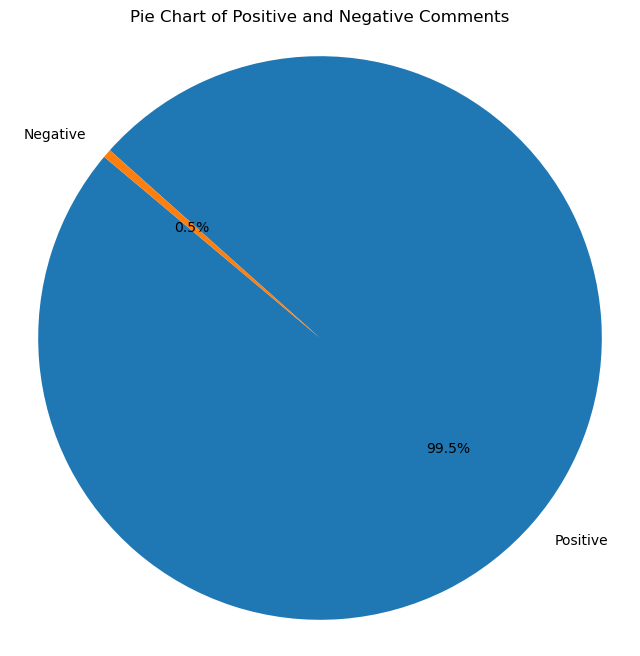

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(
    [len(positive_comments), len(negative_comments)],
    labels=['Positive', 'Negative'],
    autopct='%1.1f%%',
    startangle=140,
)
plt.title('Pie Chart of Positive and Negative Comments')
plt.axis('equal')
plt.show()

# Visualization and Statistics on calendar.csv

In [52]:
# Count the number of available and unavailable listings.
available_count = df_cleaning['available'].value_counts()[1]
unavailable_count = df_cleaning['available'].value_counts()[0]

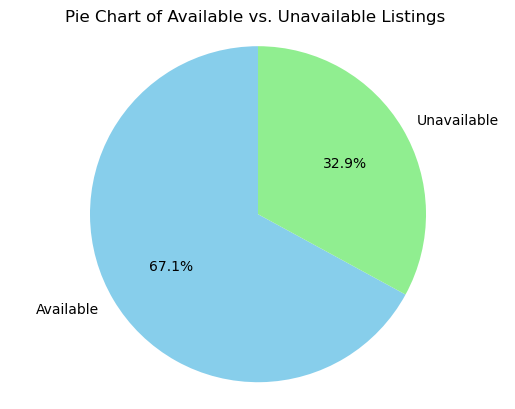

In [53]:
# Create a pie chart
labels = ['Available', 'Unavailable']
sizes = [available_count, unavailable_count]
colors = ['skyblue', 'lightgreen']
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Available vs. Unavailable Listings ')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

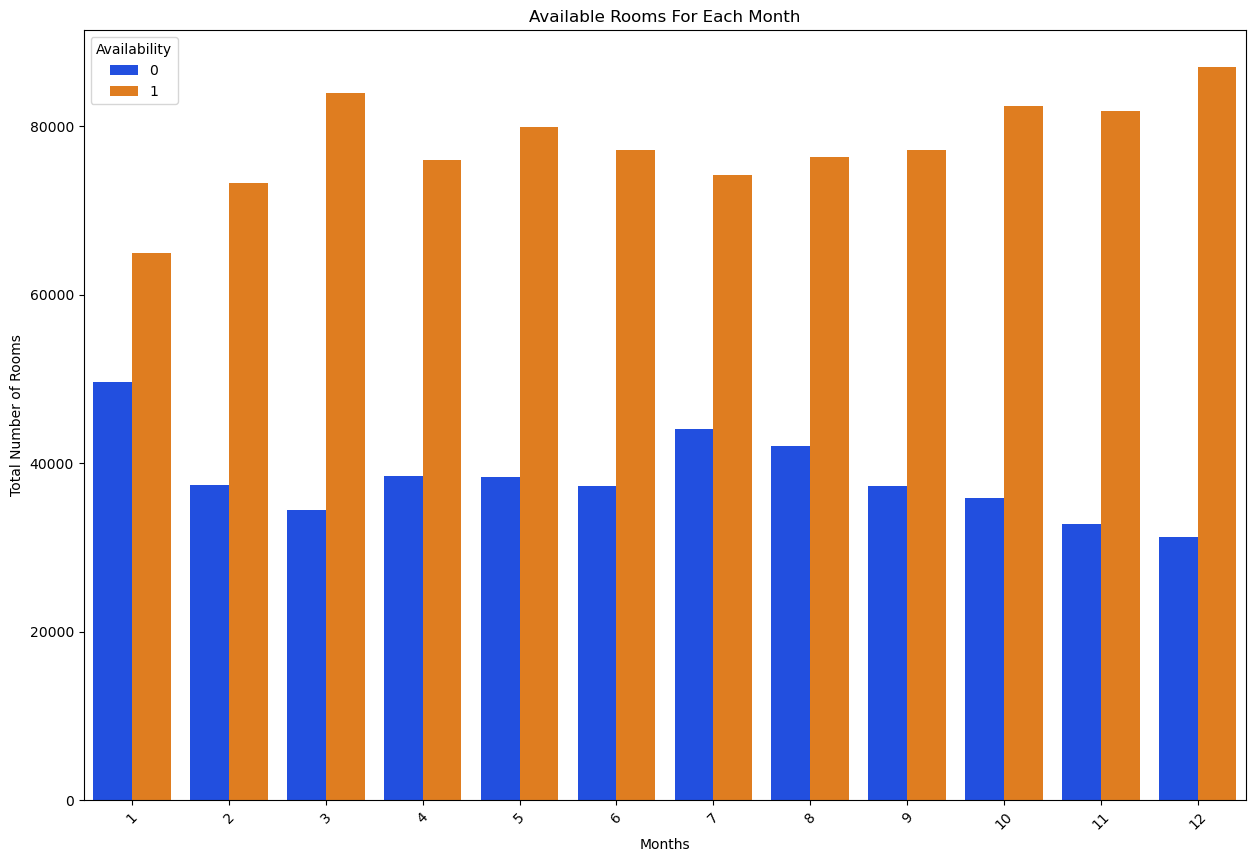

In [55]:
plt.figure(figsize=(15, 10))
sns.countplot(x = 'month',hue = 'available',data=df_cleaning, palette='bright')
plt.title('Available Rooms For Each Month')
plt.xlabel('Months')
plt.ylabel('Total Number of Rooms')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.show()

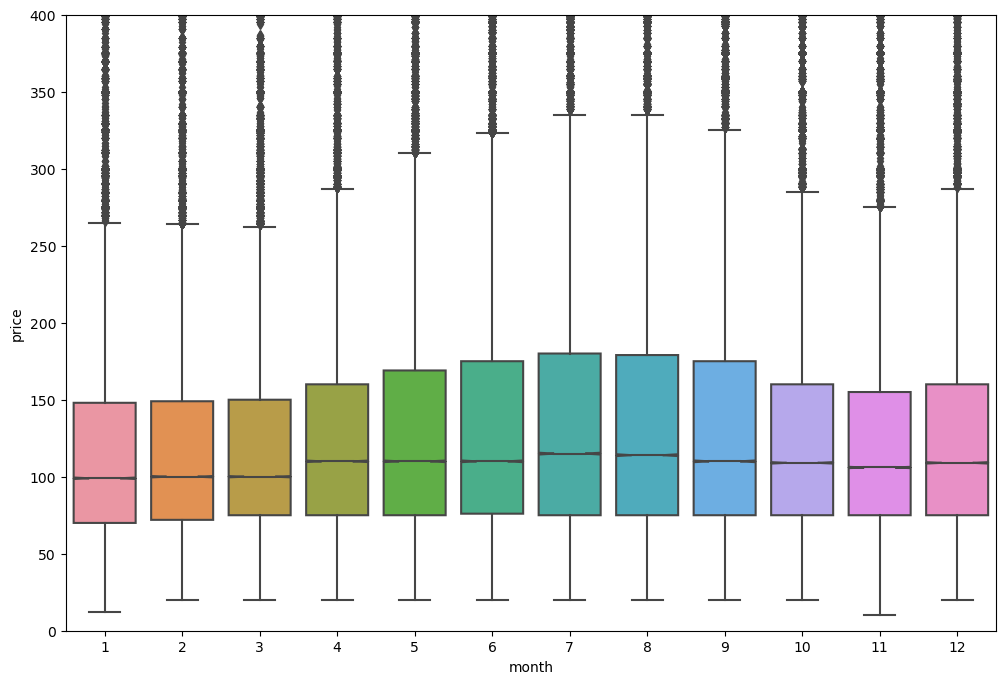

In [58]:
# Storing Only The Available Rooms
avail = df_cleaning['available'] == 1
# Creating A Data Frame For Avialable room
avail_df = df_cleaning.loc[avail,:]
plt.figure(figsize=(12, 8))
ax_1 = sns.boxplot(data = avail_df, x = 'month', y ='price', notch = True)
ax_1.set_xticklabels(ax_1.get_xticklabels())
ax_1.set_ylim(0,400)
plt.xticks(rotation=0)
plt.show()


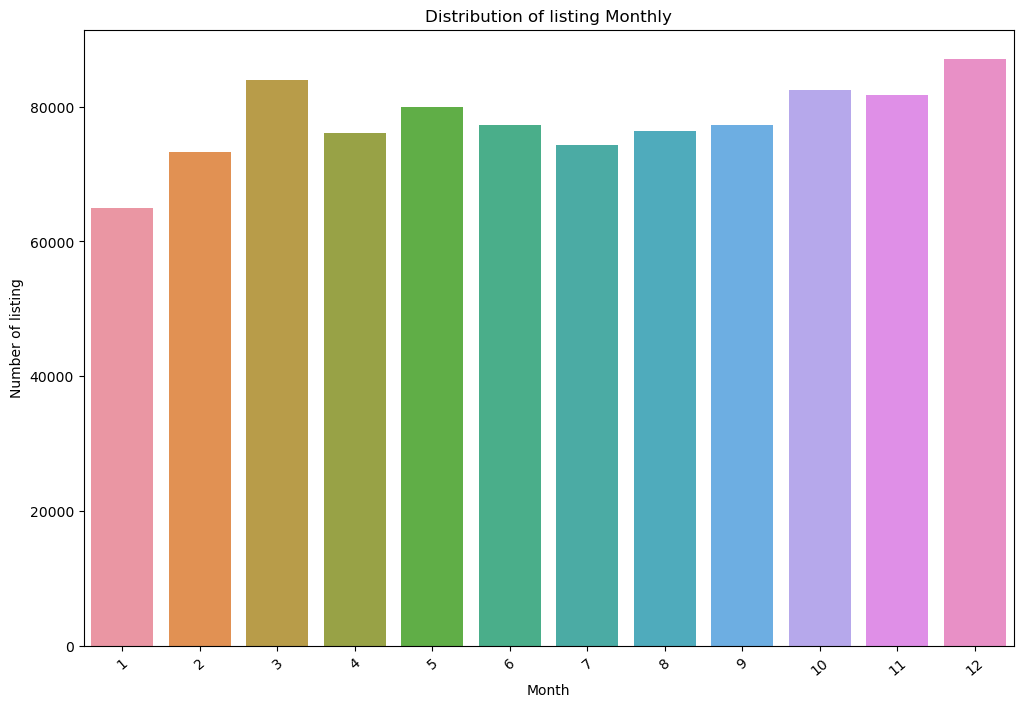

In [59]:
# Distribution of listing monthly
plt.figure(figsize=(12, 8))
listing_group = avail_df.groupby('month').count()
ax_2 = sns.barplot(x= listing_group.index.values,y =listing_group['listing_id'] )
ax_2.set_ylabel("Number of listing")
ax_2.set_xlabel("Month")
ax_2.set_title("Distribution of listing Monthly")
plt.xticks(rotation=40)
plt.show()

# Visualization and Statistics on listings.csv

In [60]:
# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

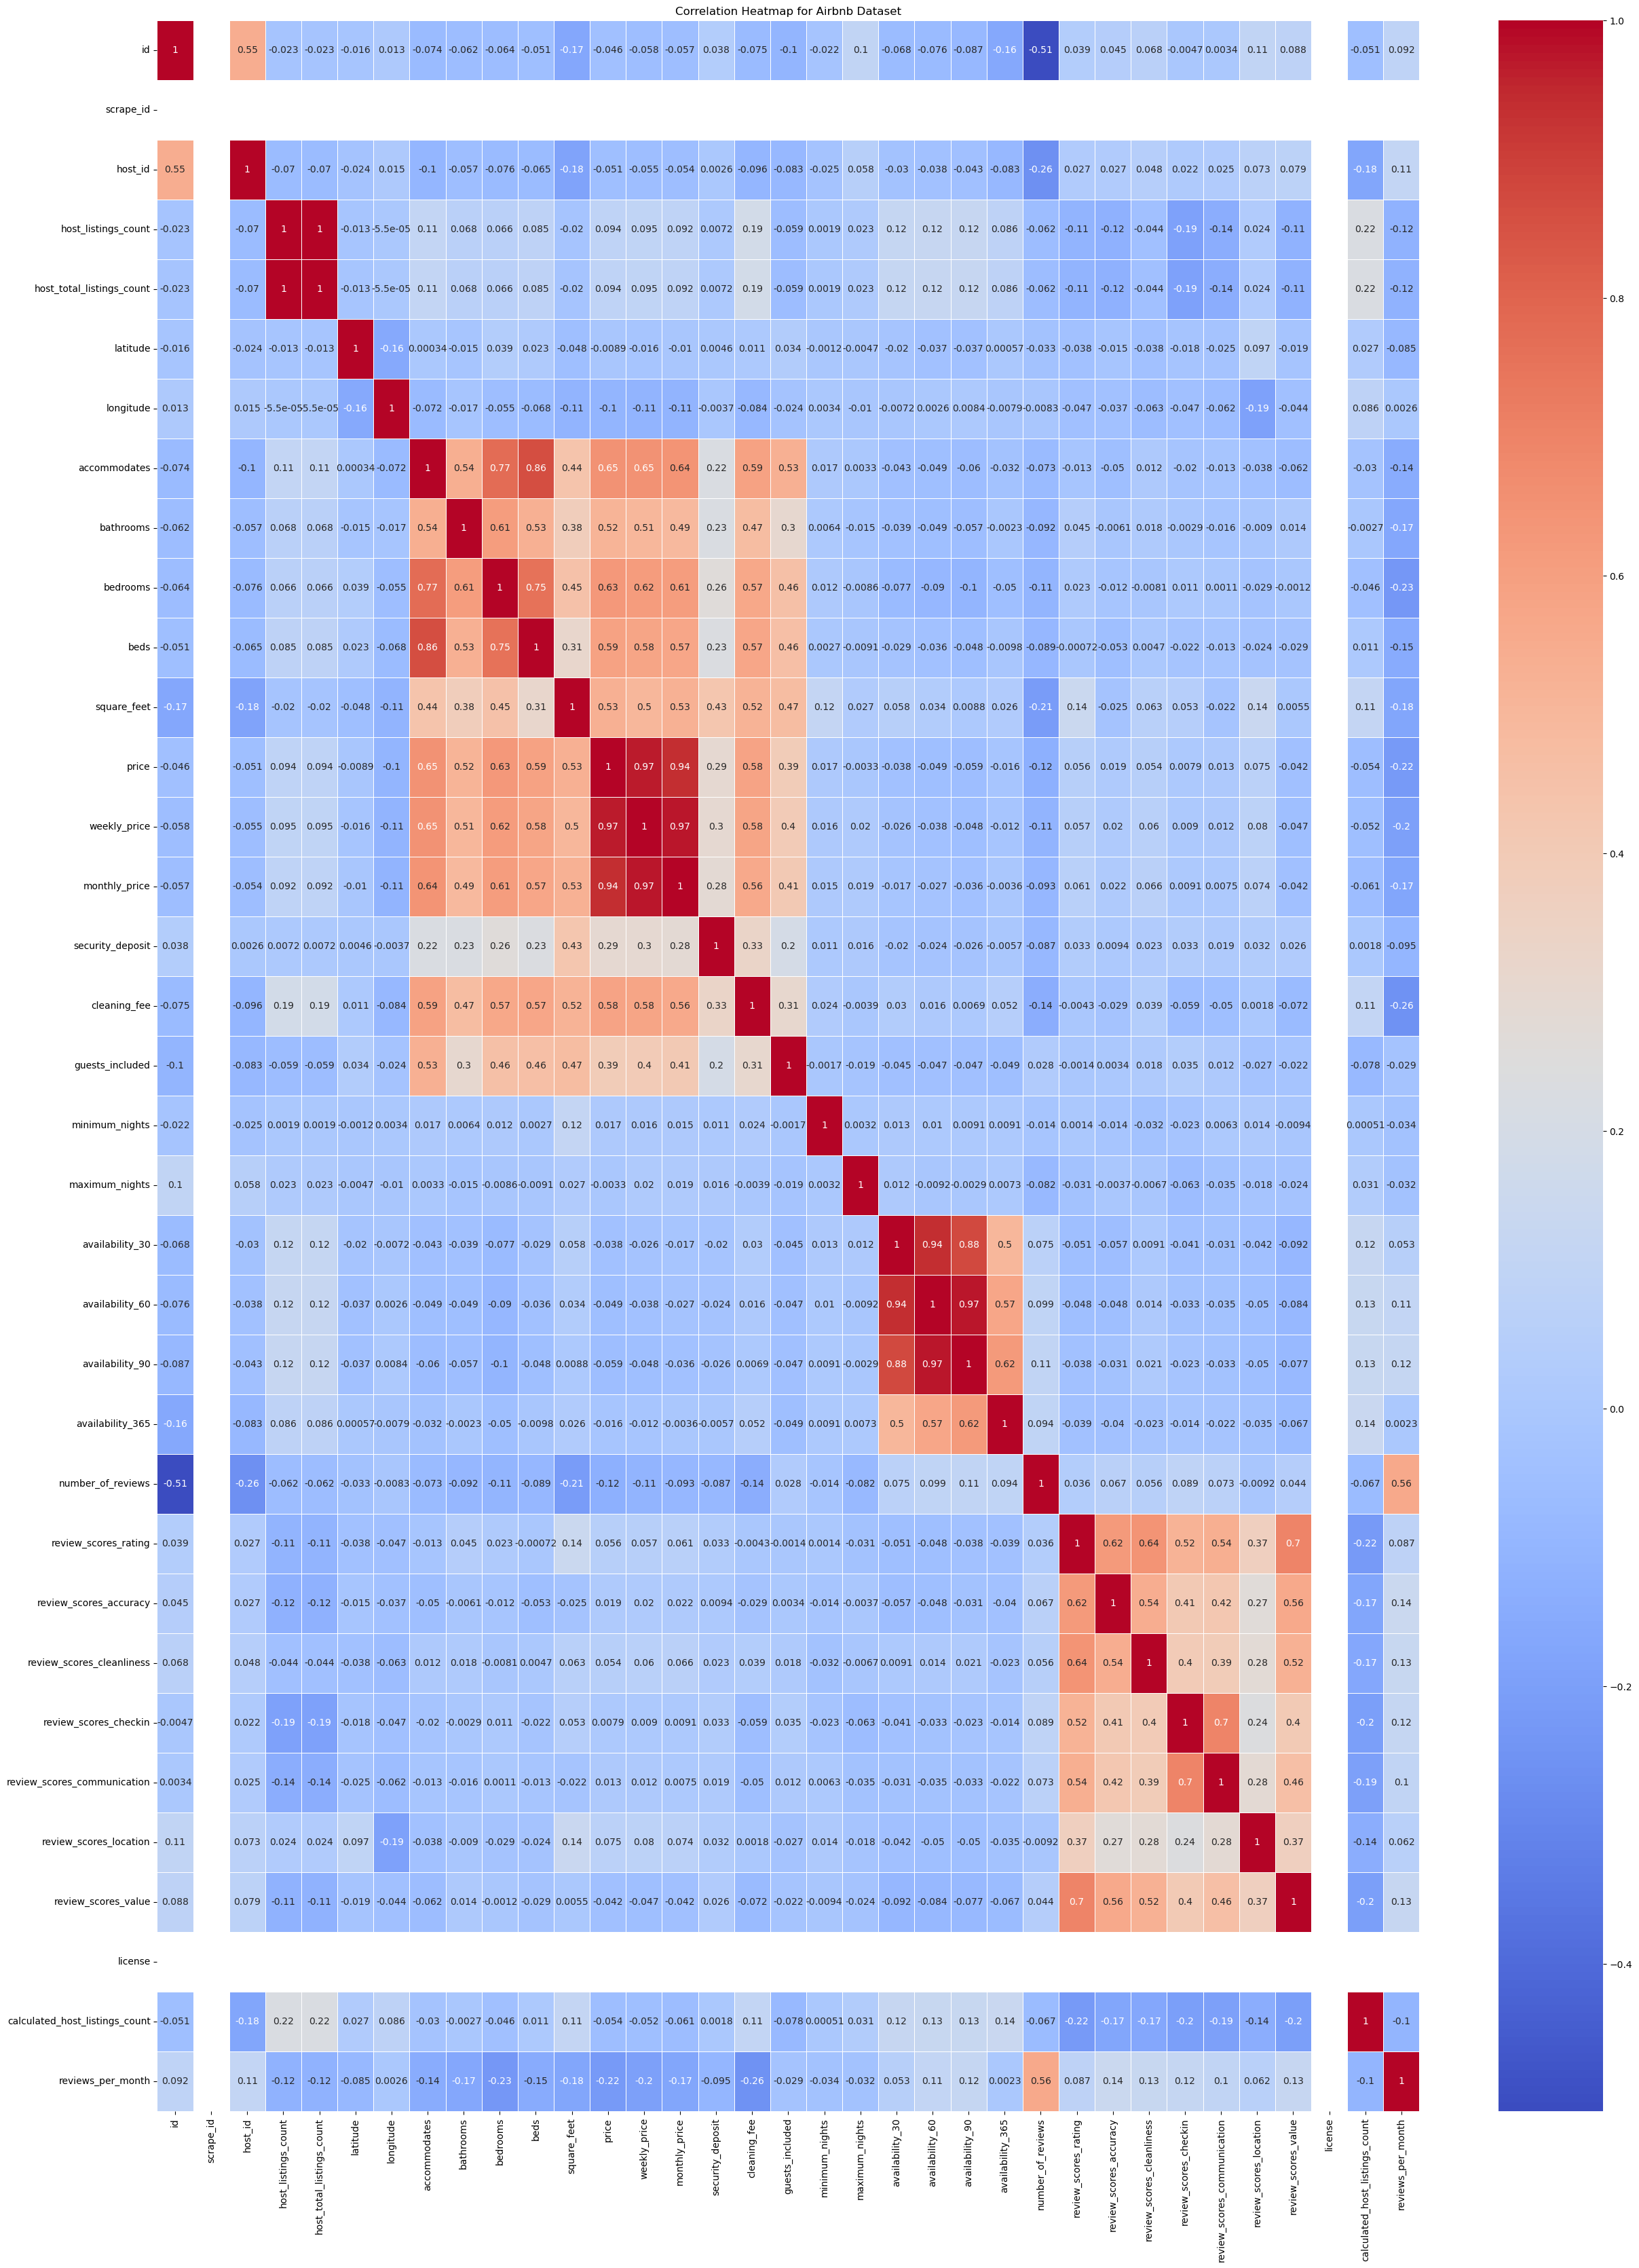

In [61]:
# Creating a heatmap to check the correlation.
plt.figure(figsize=(30,40))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Airbnb Dataset')
plt.show()

In [62]:
# Grouping the data by neighborhood and calculating the average price
average_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean()

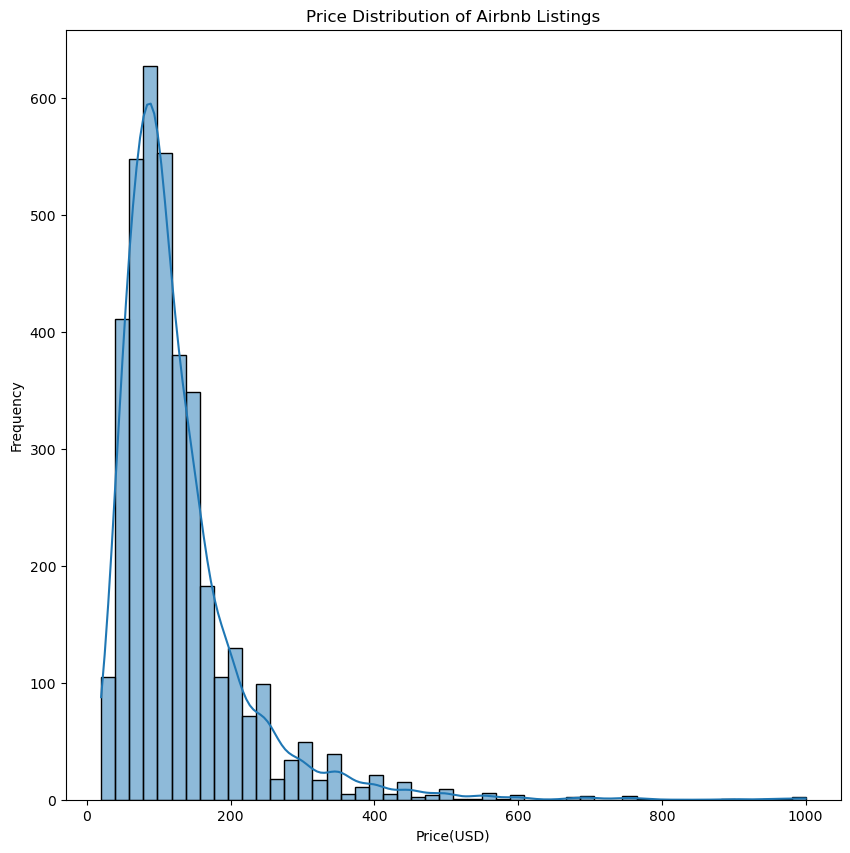

In [64]:
# Price Distribution
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='price', bins=50, kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price(USD)')
plt.ylabel('Frequency')
plt.show()

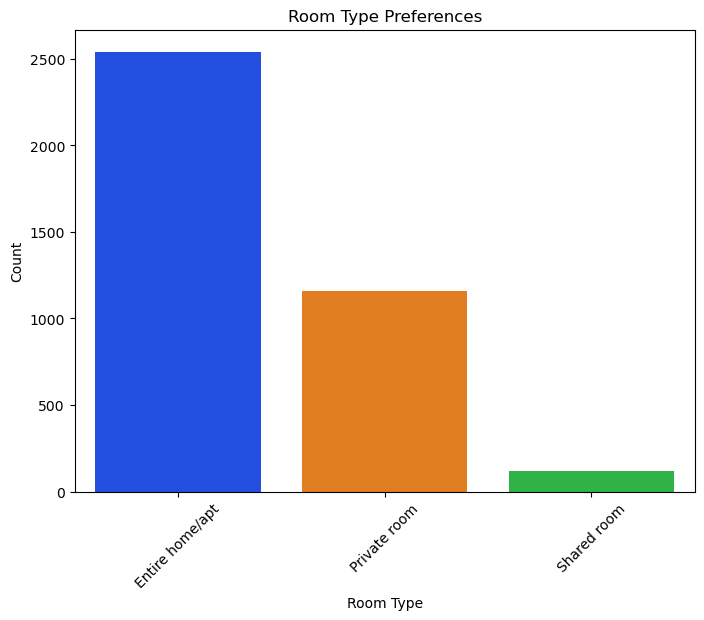

In [65]:
# Room Type Preferences
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='room_type', palette='bright')
plt.title('Room Type Preferences')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

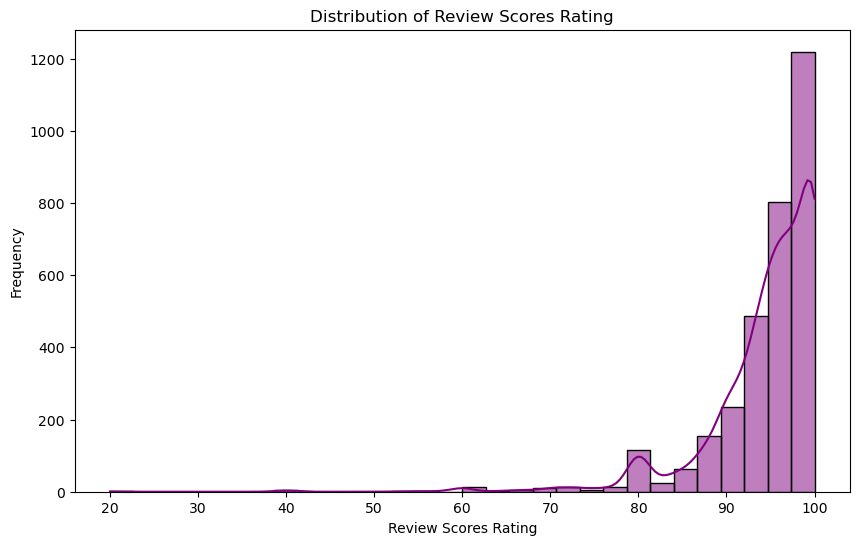

In [66]:
#Create a distribution plot (histogram) of review_scores_rating
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_scores_rating', bins=30, kde=True, color='purple')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.show()

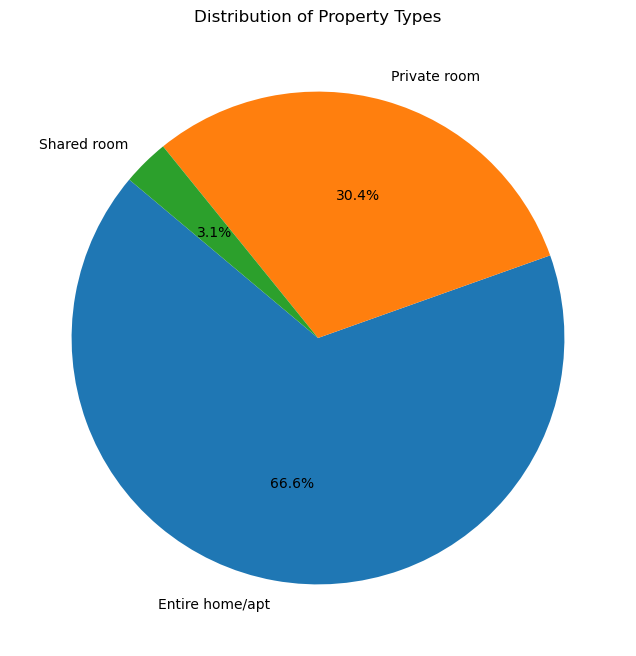

In [67]:
# Calculate the distribution of property types
property_type_counts = df['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Property Types')
plt.show()

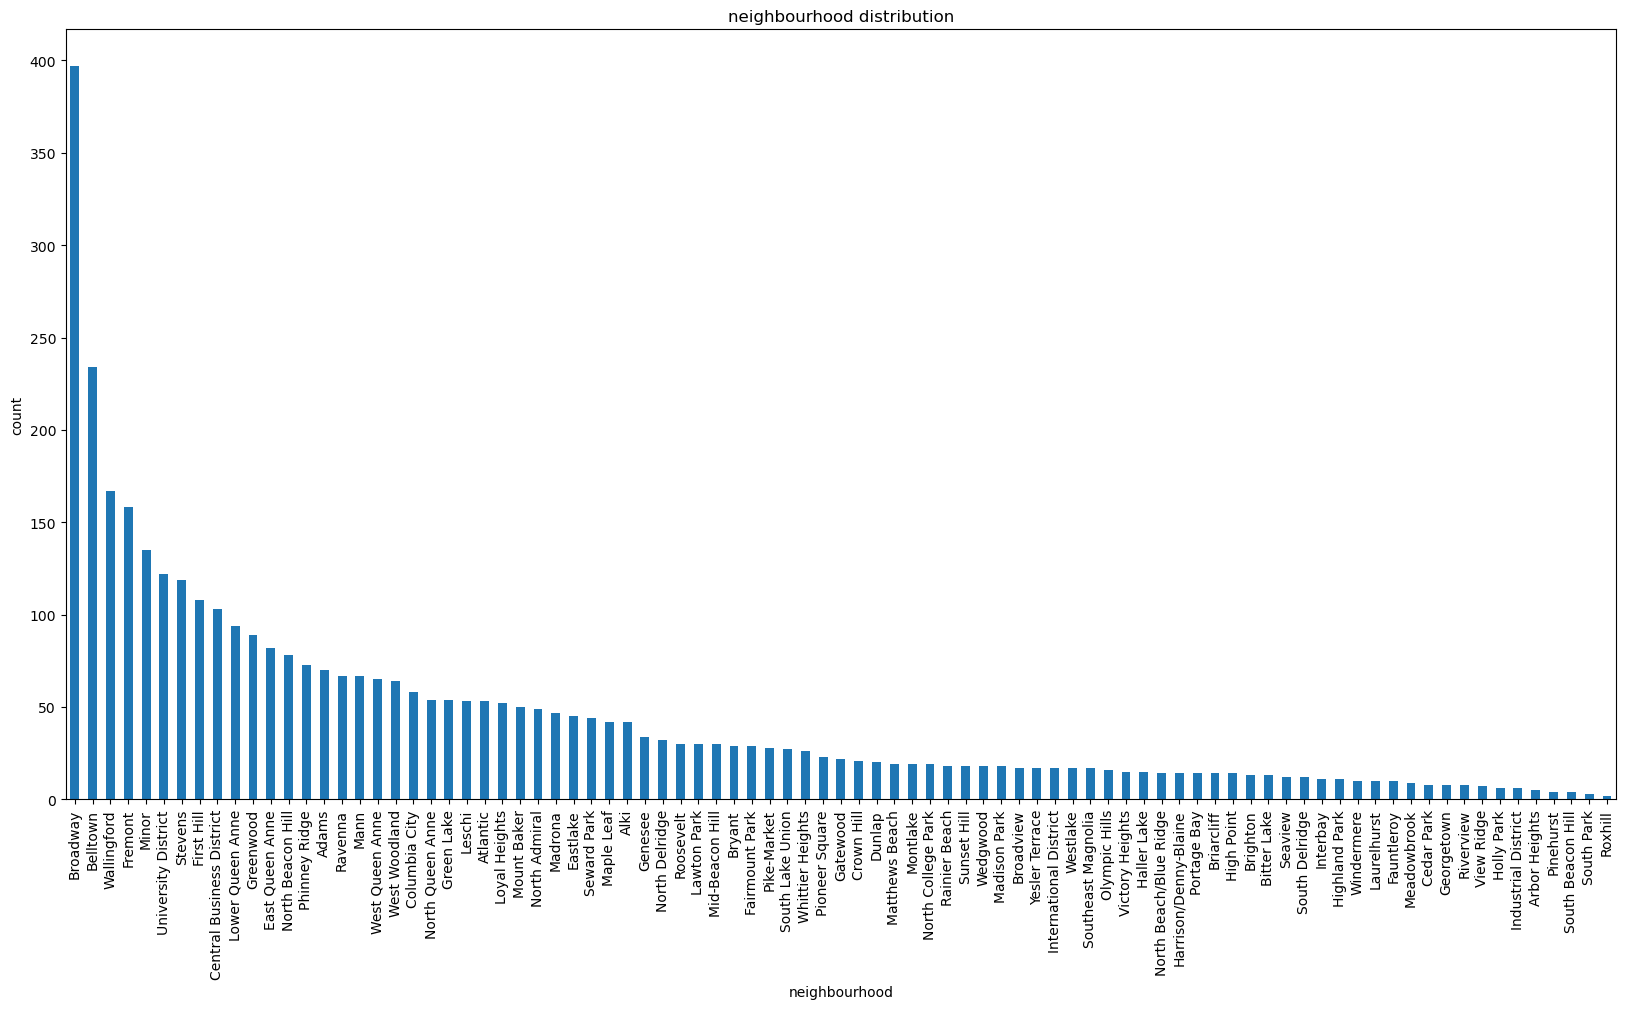

In [69]:
# Neighbourhood distribution
df['neighbourhood_cleansed'].value_counts().plot(kind='bar', figsize=(20, 10))
plt.xlabel('neighbourhood')
plt.ylabel('count')
plt.title('neighbourhood distribution');